# Tabla de contenidos

* [Preparación de datos](#preparacion_datos)
    *  [Importación de librerías](#librerias)
    * [Carga y descripción de datos](#carga)
        * [Descripción de datos](#descripcion)
        * [Descripción de Rating (ESRB)](#esrb)
        * [Información general y muestra de datos](#muestra)
    * [Corrigiendo formatos](#formatos)
    * [Duplicados explícitos y duplicados implícitos](#duplicados)
    * [Limpieza de datos](#limpieza)
    * [Valores ausentes](#nan)
    * [Enriquecimiento de datos](#enriquecer)      

* [Analisis de datos](#analisis)
    * [Análisis por plataformas](#platforms)
        * [Ventas de videojuegos por plataformas](#salesconsoles)
        * [Distribuciones de ventas en plataformas](#distributions)
        * [Ciclo de vida de las consolas](#lifecycle)
    * [Relación entre las ventas totales y las reseñas de críticos y usuarios](#scores)
        * [Correlación entre las reseñas de usuarios y las ventas totales](#userscores)
            * [¿Afectan las reseñas de usuarios a las ventas del PS4?](#user-scores-ps4)
        * [Correlación entre las reseñas de críticos y las ventas totales](#critic-scores)
            * [¿Afectan las reseñas de críticos a las ventas del PS4?](#critic-scores-ps4)
    * [Comparación de ventas de los mismos juegos en diferentes plataformas](#games)
    * [Distribución de los juegos por género](#genre)
    * [Perfil de usuario por región](#region)
    
* [Pruebas de hipótesis](#hipotesis)
    * [Las reseñas promedio de los usuarios para las plataformas Xbox One y PC son las mismas](#test1)
    * [Las reseñas promedio de los usuarios para los géneros de Acción y Deportes son diferentes](#test2)

## Preparación de datos <a class="anchor" id="preparacion_datos"></a>

La primera etapa de este proyecto va a constar de la corrección de datos, lidiar y analizar los valores ausentes, buscar duplicados explícitos e implícitos, correccion de tipos de datos, eliminar información que no es estadísticamente relevante y finalmente el enriquecimiento de la información con la que se cuenta. 

### Importación de librerías <a class="anchor" id="librerias"></a>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

### Carga y descripción de datos <a class="anchor" id="carga"></a>

In [3]:
videogames_df = pd.read_csv("../datasets/games.csv")

##### Descripción de datos <a class="descripcion" id="carga"></a>
* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género)
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
* EU_sales (ventas en Europa en millones de dólares estadounidenses)
* JP_sales (ventas en Japón en millones de dólares estadounidenses)
* Other_sales (ventas en otros países en millones de dólares estadounidenses)
* Critic_Score (máximo de 100)
* User_Score (máximo de 10)
* Rating (ESRB)

*Es posible que los datos de 2016 estén incompletos.

##### Descripción de Rating (ESRB) <a class="anchor" id="esrb"></a>

| Clasificación |      Nombre     | Edad Mínima |                               Descripción                               |
|:-------------:|:---------------:|:-----------:|:-----------------------------------------------------------------------:|
| E             | Everyone        | Todos       | Para todos. Contenido apropiado para todas las edades.                  |
| E10+          | Everyone 10+    | 10+         | Para mayores de 10. Contenido adecuado para niños mayores.              |
| EC            | Early Childhood | 3+          | Para niños pequeños. Contenido educativo o de entretenimiento.          |
| K-A           | Kids to Adults  | Todos       | (Anteriormente usado) Similar a E, apropiado para todos.                |
| T             | Teen            | 13+         | Para adolescentes. Contenido adecuado para mayores de 13.               |
| M             | Mature          | 17+         | Para mayores de 17. Contenido maduro con violencia intensa o explícita. |
| AO            | Adults Only     | 18+         | Solo para adultos. Contenido extremadamente gráfico.                    |
| RP            | Rating Pending  | N/A         | Clasificación pendiente, aún no revisado por ESRB.                      |

#### Información general y muestra de datos <a class="muestra" id="carga"></a>

In [4]:
videogames_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print(videogames_df.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


### Corrigiendo formatos <a class="anchor" id="formatos"></a>

In [6]:
# Cambia a minúsculas los nombres de columnas
new_columns_names = []  # nueva lista vacía

# Bucle que itera sobre las columnas del DF
for old_columns in videogames_df:
    new_columns = old_columns.lower()  # Cambia los nombres a minúsculas
    col_stripped = new_columns.strip()  # Quita los espacios
    # Agrega a la lista de new_column_names
    new_columns_names.append(col_stripped)

videogames_df.columns = new_columns_names  # Reemplaza los nombres

print(videogames_df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


En este punto se iteró sobre cada columna, cambiando los nombres a minúsculas y eliminando los espacios al inicio y al final de cada nombre. Los nuevos nombres se guardaron en la lista `new_column_names` y luego se reemplazaron los nombres existentes con los que están dentro de esta lista.

### Duplicados explícitos y duplicados implícitos <a class="anchor" id="duplicados"></a>

In [7]:
# Imprime el total de filas duplicadas
print(videogames_df.duplicated().sum())

0


In [8]:
# Selecciona las columnas a revisar y mostrar los valores únicos para cada una
columns_to_check = ["platform", "genre", "rating", "critic_score", "user_score"]

for column in columns_to_check:
    unique_values = sorted(videogames_df[column].unique().astype("str"))
    print(f"{column} valores únicos:\n{unique_values}\n")

platform valores únicos:
['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

genre valores únicos:
['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy', 'nan']

rating valores únicos:
['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'nan']

critic_score valores únicos:
['13.0', '17.0', '19.0', '20.0', '21.0', '22.0', '23.0', '24.0', '25.0', '26.0', '27.0', '28.0', '29.0', '30.0', '31.0', '32.0', '33.0', '34.0', '35.0', '36.0', '37.0', '38.0', '39.0', '40.0', '41.0', '42.0', '43.0', '44.0', '45.0', '46.0', '47.0', '48.0', '49.0', '50.0', '51.0', '52.0', '53.0', '54.0', '55.0', '56.0', '57.0', '58.0', '59.0', '60.0', '61.0', '62.0', '63.0', '64.0', '65.0', '66.0', '67.0', '68.0', '69.0', '70.0', '71.0', '72.0', '73.0', '74.0', '75.0', '76.0', 

Inicialmente, se confirmó que no había duplicados explícitos buscando filas completamente duplicadas. Posteriormente, se verificó que no existían duplicados implícitos al buscar valores únicos en las columnas `platform`, `genre`, `rating`, `critic_score` y `user_score`, ya que son columnas categóricas donde se podrían esperar este tipo de errores.

### Limpieza de datos <a class="anchor" id="limpieza"></a>

In [9]:
print(videogames_df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


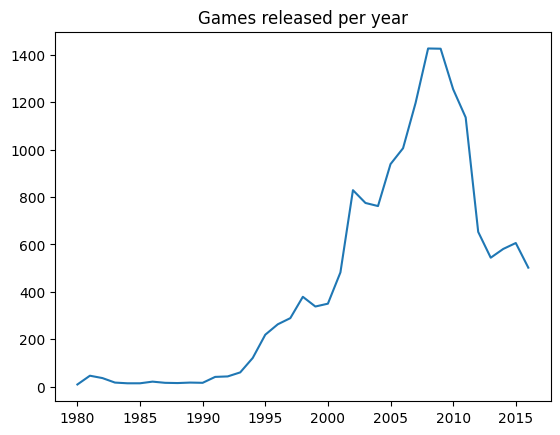

In [10]:
videogames_df.groupby("year_of_release")["name"].count().plot(
    kind="line", title="Games released per year", xlabel=""
)
plt.show()

In [11]:
# Contando los juegos lanzados en cada año
print(videogames_df["year_of_release"].value_counts(dropna=False).sort_index())

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
NaN        269
Name: count, dtype: int64


In [12]:
# Mantiene los datos posteriores a 1994 y reinicia el index
games = videogames_df.query("year_of_release >= 1994").reset_index(drop=True)

print(
    "Total de filas eliminadas",
    videogames_df["year_of_release"].count() - games["year_of_release"].count(),
    "\n",
)

Total de filas eliminadas 367 



<Axes: title={'center': 'Games released per year'}>

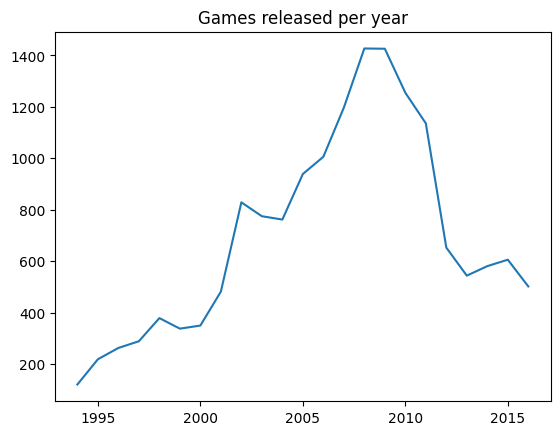

In [13]:
games.groupby("year_of_release")["name"].count().plot(
    kind="line", title="Games released per year", xlabel=""
)

Se analizó la columna `year_of_release`, revisando la cantidad de datos por año. Basado en esta información, se filtraron y eliminaron los años anteriores a 1994 debido a su irrelevancia estadística, eliminando un total de 367 filas, lo cual es menos del 5% de la información total y no afecta los resultados estadísticos.

### Valores ausentes <a class="anchor" id="nan"></a>

In [14]:
print(games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8099
user_score         6243
rating             6315
dtype: int64


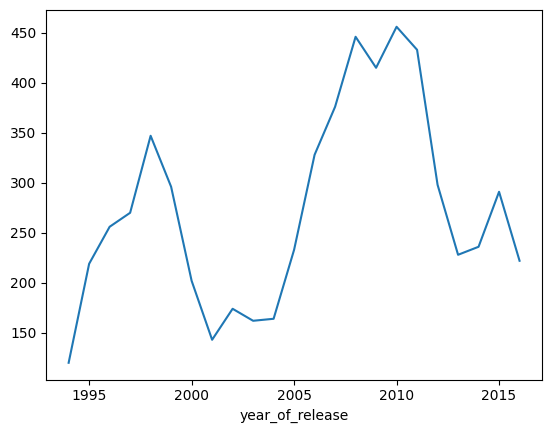

rating
NaN     6315
E       3921
T       2903
M       1535
E10+    1392
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64


In [15]:
# Imprime una gráfica mostrando en cuáles años se tienen valores ausentes en la columna 'rating'
games["rating"].isna().groupby(games["year_of_release"]).sum().plot(kind="line")
plt.show()

print(games["rating"].value_counts(dropna=False))

In [16]:
# Rellena los valores ausentes de la columna rating con RP (rating pending)
games["rating"] = games["rating"].fillna("RP")

print(games["rating"].isna().sum())

0


In [17]:
# Crea una columna nueva para 'critic_score' que se mantenga en tipo de datos float
games["critic_score_float"] = games["critic_score"]

# Rellena valores ausentes en columna 'critic_score' con 'not_rated'
games["critic_score"] = games["critic_score"].fillna("not_rated")

In [18]:
print(games["user_score"].value_counts(dropna=False).sort_values(ascending=False))

user_score
NaN    6243
tbd    2376
7.8     322
8       285
8.2     275
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 97, dtype: int64


In [19]:
# Crea una nueva columna para 'user_score' y reemplaza 'not_rated' con valores nan
games["user_score_float"] = games["user_score"].replace("tbd", np.nan)
games["user_score_float"] = games["user_score_float"].astype("float")

# Rellena valores ausentes en columna 'user_score' con 'not_rated'
games["user_score"] = games["user_score"].fillna("not_rated")

<Axes: xlabel='year_of_release'>

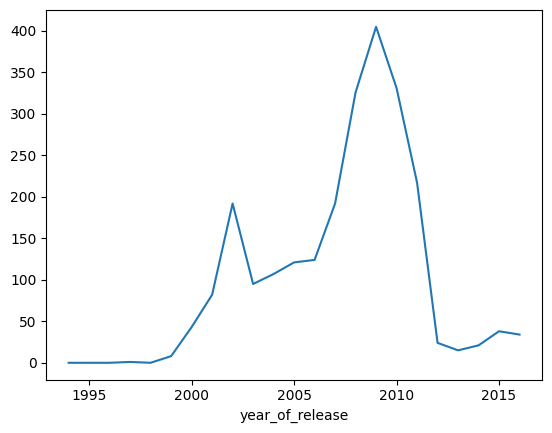

In [20]:
# Comprobando si los 'tbd' son reseñas recientes
(games["user_score"] == "tbd").groupby(games["year_of_release"]).sum().plot(kind="line")

En la columna `rating`, los valores ausentes (6,315) se rellenaron con 'RP' (Rating Pending). En la columna `user_score`, los valores con el string 'tbd' (2,376) se dejaron así y los valores ausentes (6,243) se rellenaron con 'not_rated'. En la columna `critic_score`, los valores ausentes (8,159) se rellenaron con 'not rated'.

Inicialmente, se podría suponer que los valores 'tbd' en la columna `user_score` se presentan únicamente en años recientes. Sin embargo, al analizar los valores 'tbd' a lo largo de los años, se observa como son tanto videojuegos recientes como no recientes que se quedaron sin calificación. Hay valores'tbd' que se presentan desde el año 2000.

Para evitar errores con el tipo de datos en las columnas `user_score` y `critic_score`, se crearon las nuevas columnas `user_score_float` y `critic_score_float`. En estas columnas, los strings 'not_rated' y 'tbd' se convirtieron a valores ausentes para obtener resultados más precisos al realizar cálculos, ya que asignar un valor a una calificación manipularía la información.

### Enriquecimiento de datos <a class="anchor" id="enriquecer"></a>

In [21]:
# Creando columna de 'total_sales' que suma las ventas de todas las regiones
games["total_sales"] = games[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(
    axis=1
)
print(games.sample(5))

                                      name platform  year_of_release  \
12440    Dead Island Definitive Collection     XOne           2016.0   
4674    Shin Megami Tensei: Devil Summoner      SAT           1995.0   
7181                          Roadsters 99      N64           1999.0   
2879   Harry Potter and the Goblet of Fire      PS2           2005.0   
4000             J-League Excite Stage '95     SNES           1995.0   

              genre  na_sales  eu_sales  jp_sales  other_sales critic_score  \
12440        Action      0.02      0.03      0.00         0.00         67.0   
4674   Role-Playing      0.00      0.00      0.38         0.00    not_rated   
7181         Racing      0.06      0.13      0.00         0.01    not_rated   
2879         Action      0.54      0.02      0.00         0.09         68.0   
4000         Sports      0.00      0.00      0.45         0.00    not_rated   

      user_score rating  critic_score_float  user_score_float  total_sales  
12440        4.

In [22]:
# Crea DF con nombres de Consoles + Compañías productoras + Tipos de dispositivos para referenciar

platform = [
    "Wii",
    "NES",
    "GB",
    "DS",
    "X360",
    "PS3",
    "PS2",
    "SNES",
    "GBA",
    "PS4",
    "3DS",
    "N64",
    "PS",
    "XB",
    "PC",
    "2600",
    "PSP",
    "XOne",
    "WiiU",
    "GC",
    "GEN",
    "DC",
    "PSV",
    "SAT",
    "SCD",
    "WS",
    "NG",
    "TG16",
    "3DO",
    "GG",
    "PCFX",
]

producer = [
    "Nintendo",
    "Nintendo",
    "Nintendo",
    "Nintendo",
    "Microsoft",
    "Sony",
    "Sony",
    "Nintendo",
    "Nintendo",
    "Sony",
    "Nintendo",
    "Nintendo",
    "Sony",
    "Microsoft",
    "Others",
    "Atari",
    "Sony",
    "Microsoft",
    "Nintendo",
    "Nintendo",
    "Sega",
    "Sega",
    "Sony",
    "Sega",
    "Sega",
    "Bandai",
    "SNK",
    "NEC",
    "Panasonic",
    "Sega",
    "NEC",
]


device_type = [
    "Console",
    "Console",
    "Handheld",
    "Handheld",
    "Console",
    "Console",
    "Console",
    "Console",
    "Handheld",
    "Console",
    "Handheld",
    "Console",
    "Console",
    "Console",
    "Console",
    "Console",
    "Handheld",
    "Console",
    "Console",
    "Console",
    "Console",
    "Console",
    "Handheld",
    "Console",
    "Console",
    "Handheld",
    "Handheld",
    "Console",
    "Console",
    "Handheld",
    "Console",
]

# Crear un DataFrame de plataformas con producer y device_type
platform_df = pd.DataFrame(
    {"platform": platform, "producer": producer, "device_type": device_type}
)


# Unir el DataFrame de plataformas con el DataFrame de juegos
games = games.merge(platform_df, on="platform", how="left")

# muestra del DF
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1            Mario Kart Wii      Wii           2008.0        Racing     15.68   
2         Wii Sports Resort      Wii           2009.0        Sports     15.61   
3  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   
4     New Super Mario Bros.       DS           2006.0      Platform     11.28   

   eu_sales  jp_sales  other_sales critic_score user_score rating  \
0     28.96      3.77         8.45         76.0          8      E   
1     12.76      3.79         3.29         82.0        8.3      E   
2     10.93      3.28         2.95         80.0          8      E   
3      8.89     10.22         1.00    not_rated  not_rated     RP   
4      9.14      6.50         2.88         89.0        8.5      E   

   critic_score_float  user_score_float  total_sales  producer device_type  
0                76.0

Se creó la nueva columna `total_sales`, que suma las ventas de todas las regiones. Además, se creó un DataFrame `platforms_df` que contiene la relación entre la consola (`platform`), la compañía fabricante (`producer`) y el tipo de dispositivo (`device_type`). Luego, esta información se integró en el DataFrame `games` mediante un merge left.

## Analisis de datos <a class="anchor" id="analisis"></a>

### Análisis por plataformas <a class="anchor" id="platforms"></a>

#### Ventas de videojuegos por plataformas <a class="anchor" id="salesconsoles"></a>

In [23]:
# Lista de top de ventas por plataformas

top_sales_platforms = list(
    games.groupby("platform")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top_sales_consoles = (
    games[games["device_type"] == "Console"]
    .groupby("platform")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print(
    "Top 10 consolas más vendidas:\n",
    games[games["device_type"] == "Console"]
    .groupby(["platform", "producer"])["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10),
)
top_sales_consoles = list(top_sales_consoles.index)

print()
top_sales_handheld = (
    games[games["device_type"] == "Handheld"]
    .groupby("platform")["total_sales"]
    .sum()
    .sort_values(ascending=False)
)
print(
    "Top consolas portátiles más vendidas:\n",
    games[games["device_type"] == "Handheld"]
    .groupby(["platform", "producer"])["total_sales"]
    .sum()
    .sort_values(ascending=False),
)
top_sales_handheld = list(top_sales_handheld.head(6).index)
print()
print(
    "Top productores con más ventas:\n",
    games.groupby(["producer"])["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5),
)

Top 10 consolas más vendidas:
 platform  producer 
PS2       Sony         1233.56
X360      Microsoft     961.24
PS3       Sony          931.34
Wii       Nintendo      891.18
PS        Sony          727.58
PS4       Sony          314.14
PC        Others        252.66
XB        Microsoft     251.57
N64       Nintendo      218.01
GC        Nintendo      196.73
Name: total_sales, dtype: float64

Top consolas portátiles más vendidas:
 platform  producer
DS        Nintendo    802.76
GBA       Nintendo    312.88
PSP       Sony        289.53
3DS       Nintendo    257.81
GB        Nintendo    152.08
PSV       Sony         53.81
WS        Bandai        1.42
NG        SNK           1.23
Name: total_sales, dtype: float64

Top productores con más ventas:
 producer
Sony         3549.96
Nintendo     2998.42
Microsoft    1372.13
Others        252.66
Sega           58.03
Name: total_sales, dtype: float64


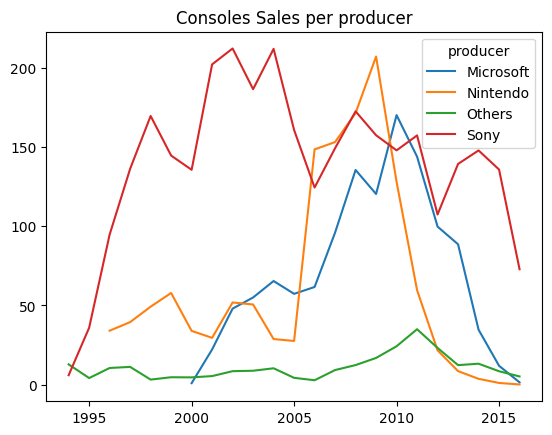

In [24]:
games[games["platform"].isin(top_sales_consoles)].pivot_table(
    index="year_of_release", columns="producer", values="total_sales", aggfunc="sum"
).plot(kind="line", title="Consoles Sales per producer", xlabel="")

plt.show()

In [25]:
print(
    (
        games[(games["producer"] == "Others") & (games["device_type"] == "Console")][
            "platform"
        ]
    ).unique()
)

['PC']


<Axes: title={'center': 'Games released per platform (top 10)'}, xlabel='platform'>

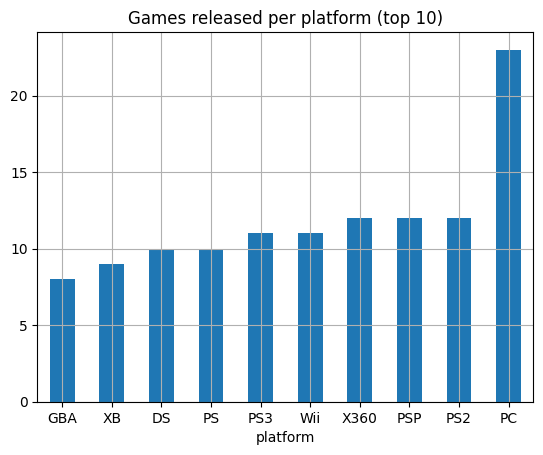

In [26]:
games.groupby("platform")["year_of_release"].nunique().sort_values().tail(10).plot(
    kind="bar", title="Games released per platform (top 10)", grid=True, rot=0
)

In [27]:
# Listas de tipos de consolas

microsoft_consoles = (
    games[(games["producer"] == "Microsoft") & (games["device_type"] == "Console")][
        "platform"
    ]
).unique()
print("Consolas de Microsoft", microsoft_consoles)

sony_consoles = (
    games[(games["producer"] == "Sony") & (games["device_type"] == "Console")][
        "platform"
    ]
).unique()
sony_handhelds = (
    games[(games["producer"] == "Sony") & (games["device_type"] == "Handheld")][
        "platform"
    ]
).unique()
print("Consolas de Sony", sony_consoles)
print("Consolas portables de Sony", sony_handhelds)

nintendo_consoles = (
    games[(games["producer"] == "Nintendo") & (games["device_type"] == "Console")][
        "platform"
    ]
).unique()
nintendo_handheld = (
    games[(games["producer"] == "Nintendo") & (games["device_type"] == "Handheld")][
        "platform"
    ]
).unique()
print("Consolas de Nintendo", nintendo_consoles)
print("Consolas portables de Nintendo", nintendo_handheld)

Consolas de Microsoft ['X360' 'XB' 'XOne']
Consolas de Sony ['PS3' 'PS2' 'PS4' 'PS']
Consolas portables de Sony ['PSP' 'PSV']
Consolas de Nintendo ['Wii' 'N64' 'SNES' 'WiiU' 'GC' 'NES']
Consolas portables de Nintendo ['GB' 'DS' 'GBA' '3DS']


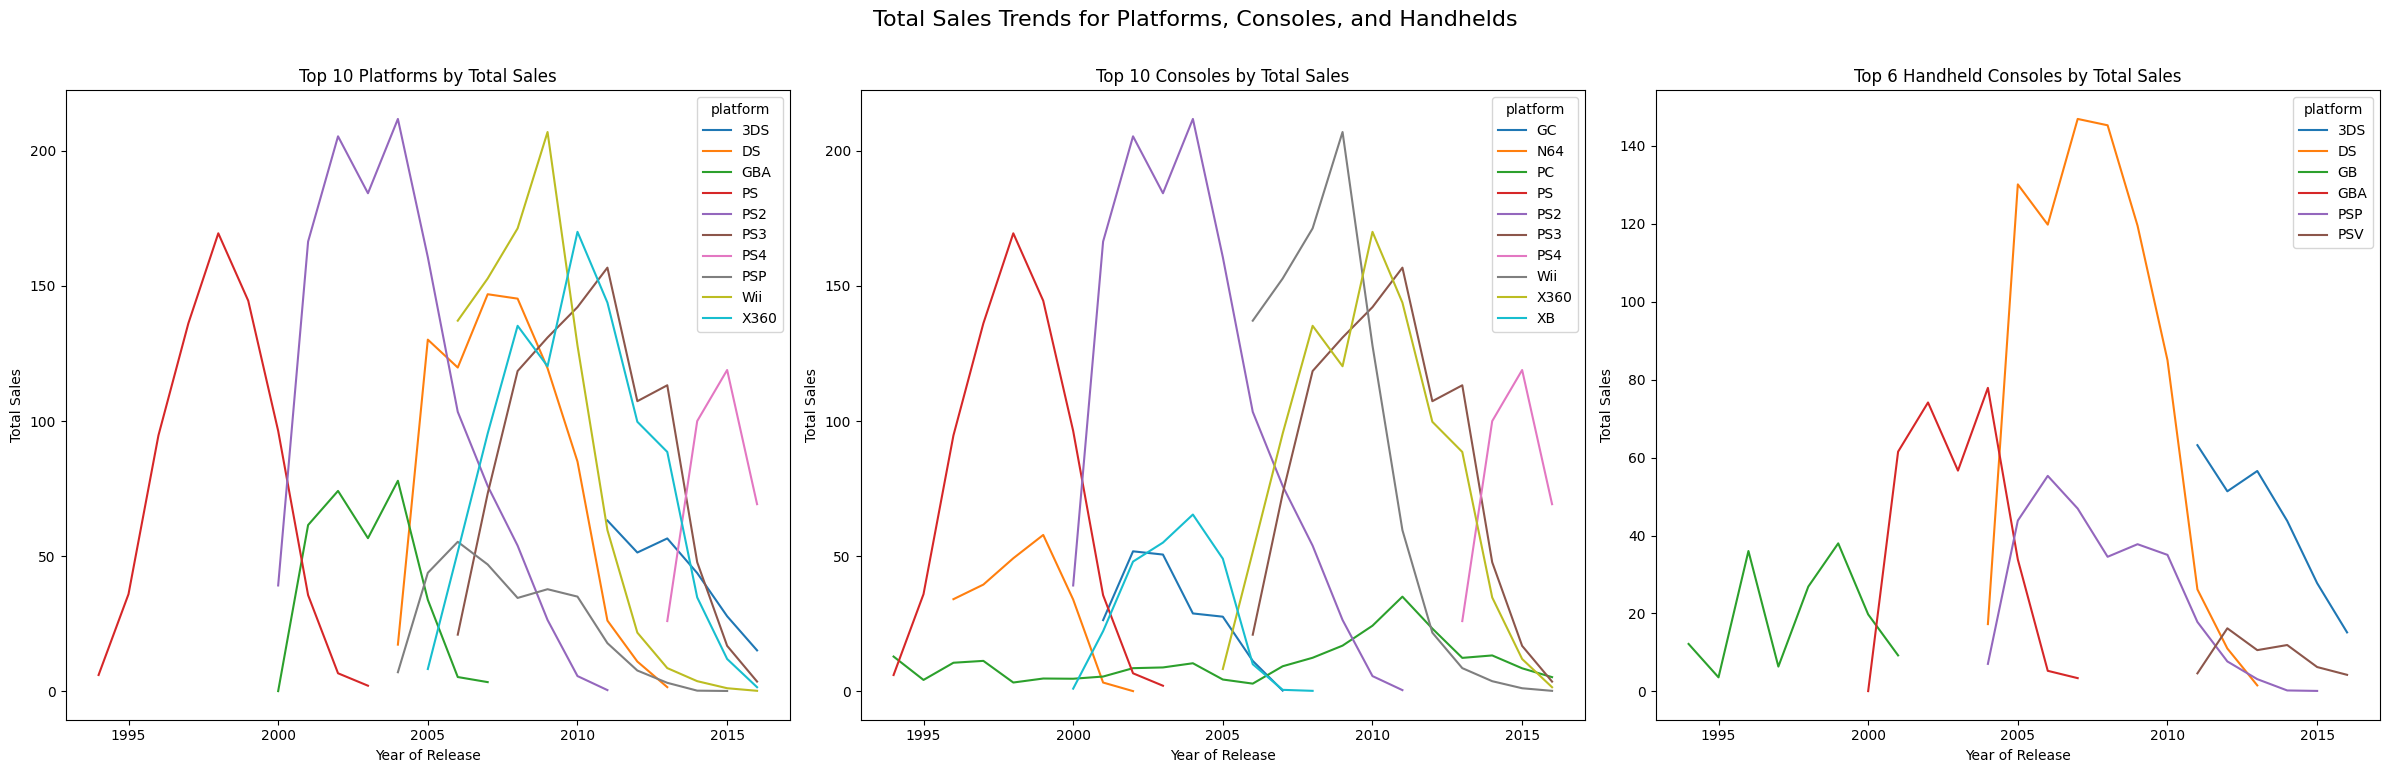

In [28]:
# Crear subplots de 1 fila por 3 columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
fig.subplots_adjust(wspace=0.3)

# Gráfico para las plataformas más vendidas
pivot_platforms = games[games["platform"].isin(top_sales_platforms)].pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)
pivot_platforms.plot(kind="line", ax=axes[0])
axes[0].set_title("Top 10 Platforms by Total Sales")
axes[0].set_xlabel("Year of Release")
axes[0].set_ylabel("Total Sales")

# Gráfico para las consolas más vendidas
pivot_consoles = games[games["platform"].isin(top_sales_consoles)].pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)
pivot_consoles.plot(kind="line", ax=axes[1])
axes[1].set_title("Top 10 Consoles by Total Sales")
axes[1].set_xlabel("Year of Release")
axes[1].set_ylabel("Total Sales")

# Gráfico para las consolas portátiles más vendidas
pivot_handhelds = games[games["platform"].isin(top_sales_handheld)].pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)
pivot_handhelds.plot(kind="line", ax=axes[2])
axes[2].set_title("Top 6 Handheld Consoles by Total Sales")
axes[2].set_xlabel("Year of Release")
axes[2].set_ylabel("Total Sales")

# Título principal
fig.suptitle(
    "Total Sales Trends for Platforms, Consoles, and Handhelds", fontsize=16, y=0.96
)

# Ajustar el layout
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título principal
plt.show()

Las consolas que más videojuegos han vendido son de Sony (PlayStation), Microsoft (Xbox) y Nintendo. La plataforma que más ventas ha tenido hasta 2016 es el PlayStation 2 de Sony con $1,234 MDD, seguido por el Xbox 360 de Microsoft con $961 MDD. La tercera consola con más ventas es nuevamente de Sony, el PlayStation 3.

En cuanto a las consolas portátiles, las que más juegos han vendido son de Nintendo, registrando ventas en el DS de $803 MDD, el GBA de $313 MDD y finalmente el PSP de Sony con $290 MDD. En general, las ventas de videojuegos en consolas no portátiles son mayores que las de consolas portátiles.

Al visualizar las ventas por productor a través del tiempo, se aprecia que desde 1995 la compañía que globalmente ha tenido mayores ventas totales es Sony, con $3,550 MDD, manteniéndose casi siempre por encima de sus competidores a través de los años. Nintendo se encuentra en el segundo lugar, con ventas totales de $2,998 MDD. Aunque no siempre ha estado por encima de su competencia, entre 2008 y 2012 tuvo un pico en ventas, llegando a superar a Sony en ese periodo. Sin embargo, parece que en los últimos años no ha recuperado su posición y en 2015 se posicionaba con las ventas más bajas entre los tres.

Microsoft, que entró al mercado en el año 2000, ha registrado ventas globales de $1,372 MDD, casi siempre por debajo de su competencia, a excepción de alrededor del año 2010. Curiosamente, el productor registrado como "Others", que indica las ventas del PC, a pesar de nunca haber estado en el top de ventas, se ha mantenido consistentemente a través de los años y ha registrado ventas de $252 MDD hasta 2016. Se podría decir que el PC es la consola atemporal por defecto y también es la plataforma que tiene la mayor cantidad de juegos disponibles.

#### Distribuciones de ventas en plataformas <a class="anchor" id="distributions"></a>

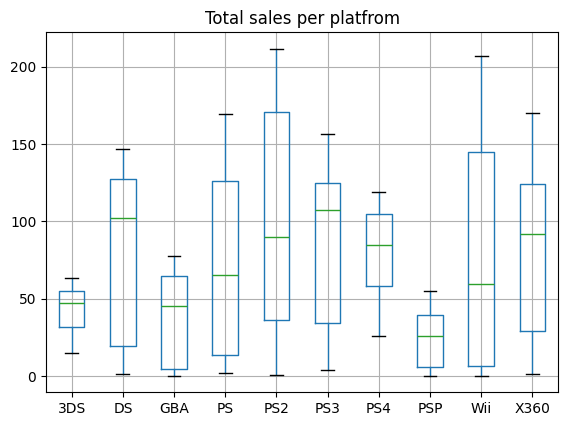

In [114]:
sales_per_year = (
    games.groupby(["year_of_release", "platform"])["total_sales"].sum().reset_index()
)

sales_per_year[sales_per_year["platform"].isin(top_sales_platforms)][
    ["total_sales", "platform"]
].boxplot(
    column="total_sales",
    by="platform",
)

plt.suptitle("")
plt.title("Total sales per platfrom")
plt.xlabel("")
plt.show()

La consola PS2 cuenta con un rango de ventas amplio y variado, la presencia de líneas de bigote tan largas (positiva y negativamente) indica que tuvo videojuegos con ventas extremadamente altas (superando los $200 MDD) y también extremadamente bajas. El mismo fenómeno se repite con la consola PS3, el Xbox 360 y el DS pero en un rango menor y en este caso sus videojuegos muestran una media de ventas más alta con respecto a su distribución lo cual indica que existieron múltiples juegos con un éxito alto para estas plataformas. En el caso de la consola Wii muestra también una alta variabilidad en las ventas de videojuegos con una media baja con respecto a su dispersión y un bigote positivo amplio esto sugiere que, esta plataforma en su mayoría tuvo ventas medias de alrededor de $50 MDD pero, las ventas de algunos de sus videojuegos más exitosos llegaron a ser de $200 MDD.

La media da las consolas PSP y 3DS muestran son relativamente bajas comparadas con otras consolas, indicando que la mayoría de sus juegos no alcanzaron ventas tan altas. Al mismo tiempo, las distribuciones más estrechas sugieren que las ventas en estas plataformas fueron consistentes y menos variables.

#### Ciclo de vida de las consolas <a class="anchor" id="lifecycle"></a>

In [30]:
sales_per_year_pivot = games[games["platform"].isin(top_sales_consoles)].pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)

print("Consolas")
sales_per_year_pivot

Consolas


platform,GC,N64,PC,PS,PS2,PS3,PS4,Wii,X360,XB
year_of_release,,,,,,,,,,
1994.0,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995.0,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996.0,NaN,34.10,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997.0,NaN,39.50,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998.0,NaN,49.24,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999.0,NaN,57.87,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000.0,NaN,33.97,4.66,96.37,39.17,NaN,NaN,NaN,NaN,0.99
2001.0,26.34,3.25,5.47,35.59,166.43,NaN,NaN,NaN,NaN,22.26
2002.0,51.81,0.08,8.57,6.67,205.38,NaN,NaN,NaN,NaN,48.01


In [31]:
sales_per_year_handheld_pivot = games[
    games["platform"].isin(top_sales_handheld)
].pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)

print("Consolas portátiles")
sales_per_year_handheld_pivot

Consolas portátiles


platform,3DS,DS,GB,GBA,PSP,PSV
year_of_release,,,,,,
1994.0,NaN,NaN,12.18,NaN,NaN,NaN
1995.0,NaN,NaN,3.60,NaN,NaN,NaN
1996.0,NaN,NaN,36.03,NaN,NaN,NaN
1997.0,NaN,NaN,6.37,NaN,NaN,NaN
1998.0,NaN,NaN,26.90,NaN,NaN,NaN
1999.0,NaN,NaN,38.00,NaN,NaN,NaN
2000.0,NaN,NaN,19.76,0.07,NaN,NaN
2001.0,NaN,NaN,9.24,61.53,NaN,NaN
2002.0,NaN,NaN,NaN,74.16,NaN,NaN


Observando el comportamiento de las ventas por productor

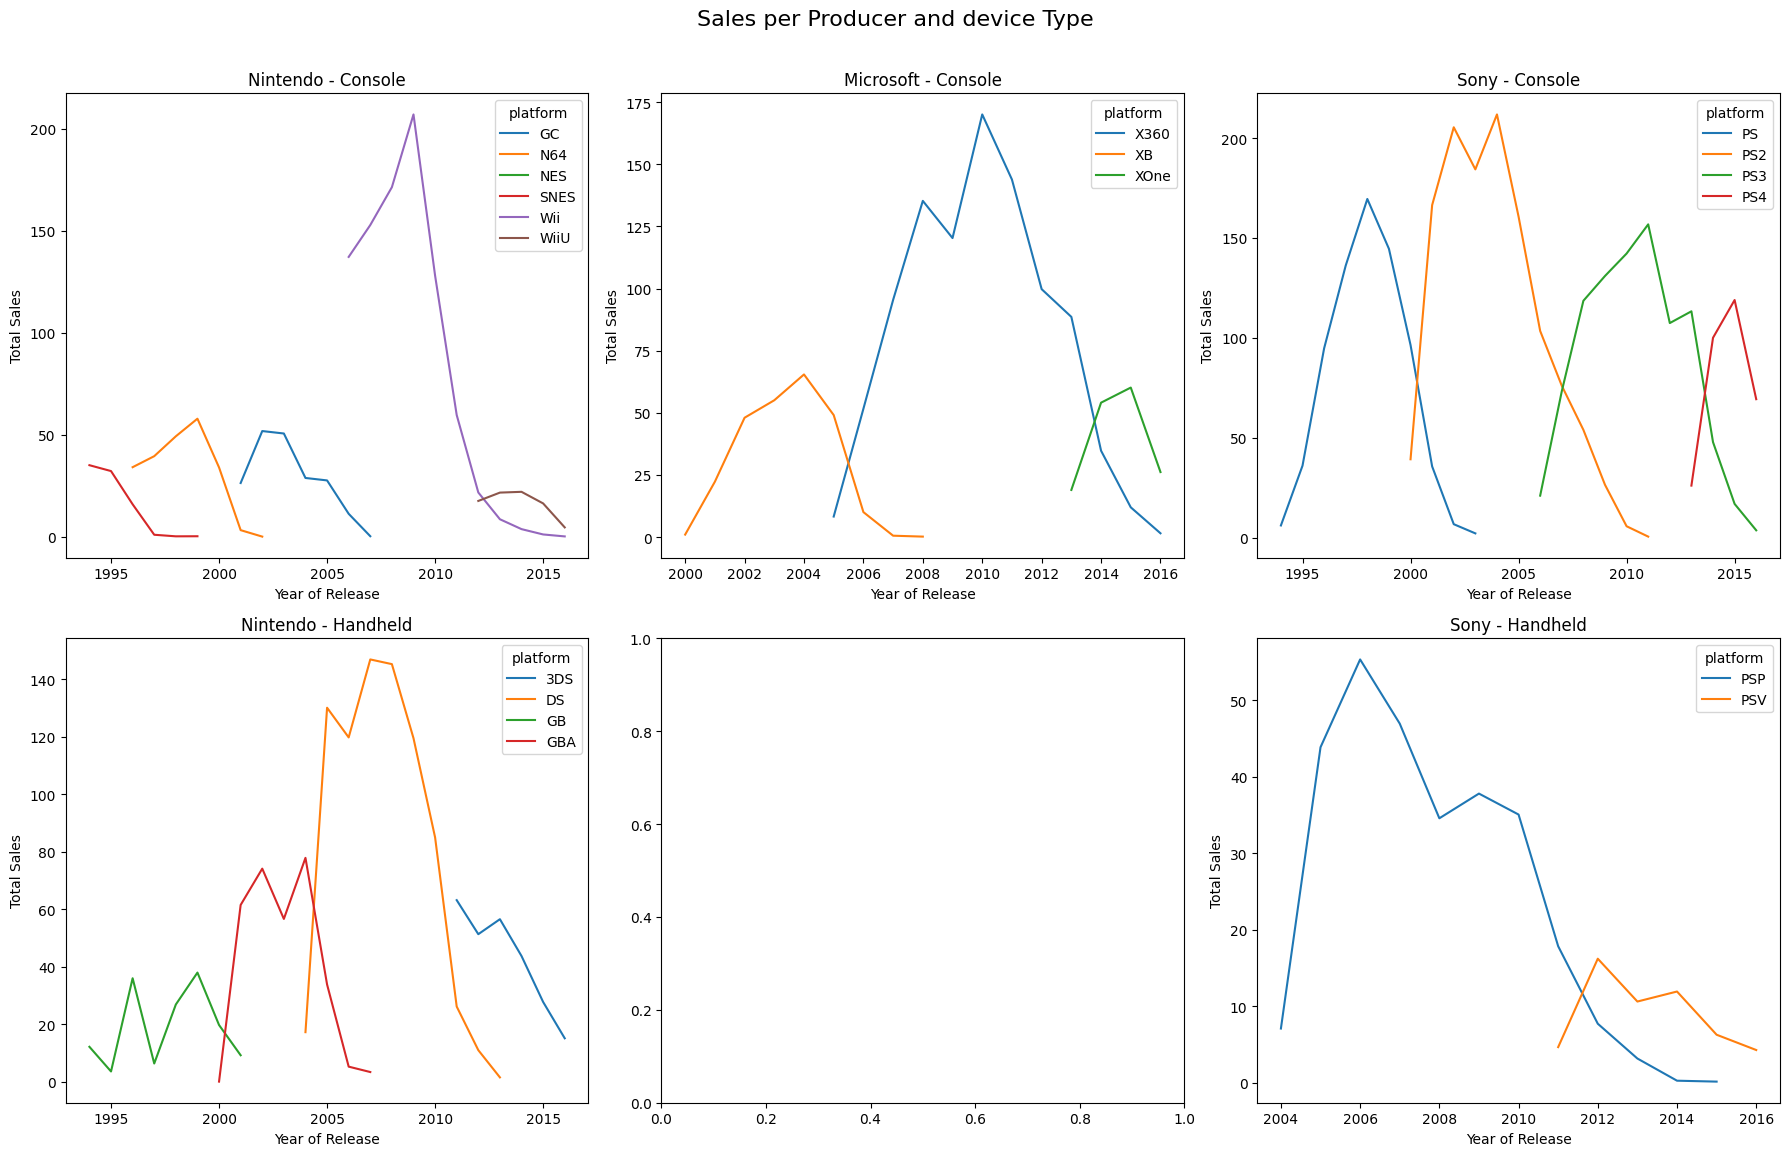

In [32]:
# Lista de tipos de dispositivo a analizar
device_types = ["Console", "Handheld"]

# Crear subplots de 2 filas por 3 columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Crear gráficos por fabricante y tipo de dispositivo
for device_type, row in zip(device_types, axes):
    for ax, producer in zip(row, games["producer"].unique()):
        # Filtrar datos
        filtered_data = games[
            (games["producer"] == producer) & (games["device_type"] == device_type)
        ]

        if not filtered_data.empty:
            # Pivotear los datos para la gráfica de líneas
            pivot = filtered_data.pivot_table(
                index="year_of_release",
                columns="platform",
                values="total_sales",
                aggfunc="sum",
            )

            # Graficar
            pivot.plot(kind="line", ax=ax)
            ax.set_title(f"{producer} - {device_type}")
            ax.set_xlabel("Year of Release")
            ax.set_ylabel("Total Sales")

# Título principal
fig.suptitle("Sales per Producer and device Type", fontsize=16, y=0.96)

# Ajustar el layout
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título principal
plt.show()

El ciclo de vida de las consolas de videojuegos varía según el éxito de los videojuegos disponibles para cada modelo y la estrategia de lanzamiento de nuevos productos por parte de los fabricantes. Este ciclo generalmente oscila entre los 7 y los 12 años. Las ventas de videojuegos son un factor clave que determina cuándo una consola alcanza el final de su vida útil. Cuando las ventas empiezan a bajar, los fabricantes suelen lanzar nuevas consolas para mantener el interés del mercado.

En el caso de Nintendo, el ciclo de vida de sus consolas parece depender significativamente del éxito de los videojuegos asociados. Por ejemplo, consolas como el DS y el Wii lograron mantener altas ventas de videojuegos durante aproximadamente 10 años debido a su popularidad, mientras que otras consolas, como el GC y el Wii U, tuvieron ciclos de vida más cortos de alrededor de 7 años debido a menores ventas de videojuegos.

Las consolas de Microsoft también muestran una dependencia del éxito de sus videojuegos. Las ventas de videojuegos para el Xbox original duraron alrededor de 8 años, mientras que el Xbox 360 tuvo un ciclo de vida más prolongado, de aproximadamente 11 años, debido a su mayor éxito. Por otro lado, el Xbox One ya muestra una disminución en ventas de videojuegos, indicando que su ciclo de vida será menor a 10 años, lo que destaca la variabilidad basada en el éxito de los juegos.

Sony, por otro lado, tiende a mantener un ciclo de vida más prolongado para sus consolas. Tanto las consolas tradicionales como las portátiles de Sony han mostrado ventas de videojuegos durante alrededor de 10 años. Sin embargo, una excepción notable es el PS4, cuyas ventas de videojuegos comenzaron a disminuir hacia 2016, sugiriendo que su ciclo de vida podría ser más corto de lo esperado para una consola de Sony.

En general, las ventas de videojuegos determinan la longevidad de las consolas de videojuegos. Los fabricantes como Nintendo, Microsoft y Sony ajustan sus estrategias de lanzamiento basándose en las tendencias de ventas de videojuegos. Una tendencia común es que nuevas consolas se lanzan cuando las ventas de las consolas actuales comienzan a disminuir, asegurando una transición fluida y manteniendo el interés del mercado. Esto no solo ayuda a revitalizar las ventas, sino que también impulsa el desarrollo continuo de nuevos juegos, lo que a su vez prolonga el ciclo de vida de las plataformas.

### Relación entre las ventas totales y las reseñas de críticos y usuarios <a class="anchor" id="scores"></a>

In [33]:
games[["critic_score_float", "user_score_float"]].describe()

,critic_score_float,user_score_float
count,7980.000000,7460.000000
mean,68.994236,7.127024
std,13.920962,1.498533
min,13.000000,0.000000
25%,60.000000,6.400000
50%,71.000000,7.500000
75%,79.000000,8.200000
max,98.000000,9.700000


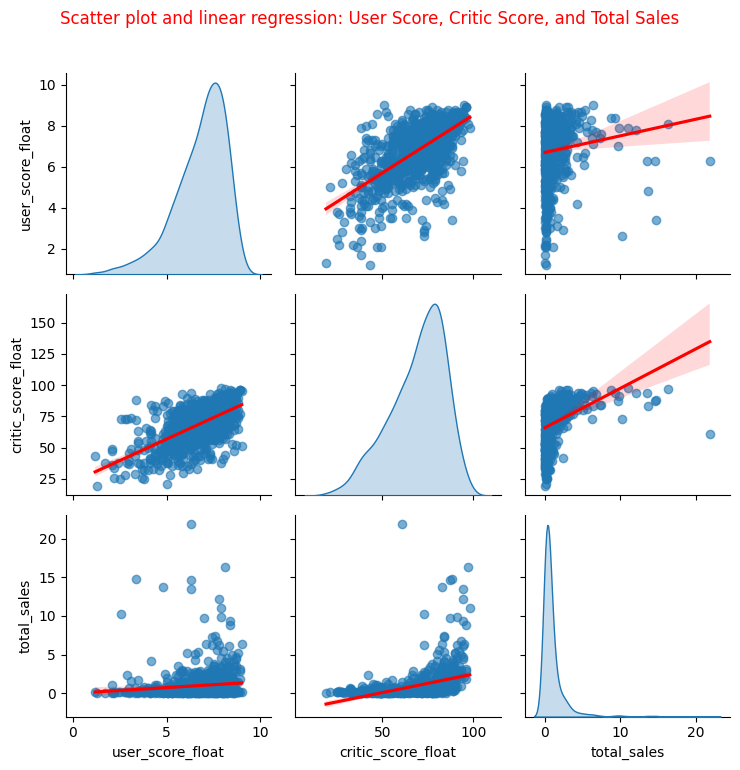

In [110]:
# Filtra los datos para la plataforma PS4
platform_name = "X360"

platform_scores = games[games["platform"] == platform_name][
    ["user_score_float", "critic_score_float", "total_sales"]
].dropna()

pairplot = sns.pairplot(
    platform_scores,
    kind="reg",
    diag_kind="kde",
    plot_kws={"line_kws": {"color": "red"}, "scatter_kws": {"alpha": 0.6}},
)

pairplot.fig.suptitle(
    "Scatter plot and linear regression: User Score, Critic Score, and Total Sales",
    y=1.02,
    fontsize=12,
)

plt.tight_layout()
plt.show()

In [35]:
# DataFrame que contiene solo las reseñas de criticos, de usuarios y ventas totales
games_scores = games[["critic_score_float", "user_score_float", "total_sales"]].dropna()

# Calculando la correlación y el valor-p de Pearson para 'user_score_float' y 'total_sales'
correlation, p_value = st.pearsonr(
    games_scores["user_score_float"], games_scores["total_sales"]
)
print(
    f"Correlación entre reseñas de usuarios y ventas totales:\nCoeficiente de correlación: {correlation}\nP-valor: {p_value}"
)
print()

# Correlación entre 'user_score_float' y 'total_sales' para el PS4
correlation, p_value = st.pearsonr(
    platform_scores["user_score_float"], platform_scores["total_sales"]
)
print(
    f"Correlación entre reseñas de usuarios y ventas totales para el PS4:\nCoeficiente de correlación: {correlation}\nP-valor: {p_value}"
)

Correlación entre reseñas de usuarios y ventas totales:
Coeficiente de correlación: 0.0883007699603779
P-valor: 2.087894076278144e-13

Correlación entre reseñas de usuarios y ventas totales para el PS4:
Coeficiente de correlación: 0.1102796717286905
P-valor: 0.0011906778822344203


In [36]:
# Calculando la correlación y el valor-p de Pearson para 'critic_score_float' y 'total_sales'
correlation, p_value = st.pearsonr(
    games_scores["critic_score_float"], games_scores["total_sales"]
)
print(
    f"Correlación entre reseñas de críticos y ventas totales:\nCoeficiente de correlación: {correlation}\nP-valor: {p_value}"
)
print()

# Correlación entre 'critic_score_float' y 'total_sales' para el PS4
correlation, p_value = st.pearsonr(
    platform_scores["critic_score_float"], platform_scores["total_sales"]
)
print(
    f"Correlación entre reseñas de críticos y ventas totales para el PS4:\nCoeficiente de correlación: {correlation}\nP-valor: {p_value}"
)

Correlación entre reseñas de críticos y ventas totales:
Coeficiente de correlación: 0.2371187453178735
P-valor: 1.098488838048103e-88

Correlación entre reseñas de críticos y ventas totales para el PS4:
Coeficiente de correlación: 0.3889921155786258
P-valor: 1.7328232318072326e-32


#### Correlación entre las reseñas de usuarios y las ventas totales <a class="anchor" id="userscores"></a>

Se calculó el coeficiente de correlación de Pearson para determinar la correlación entre user_score_float y total_sales. El resultado del coeficiente de correlación de 0.088~ indica una correlación débil o casi inexistente. Sin embargo, el valor-p, al ser muy cercano a 0, indica que la correlación observada es estadísticamente significativa.

Aunque la correlación entre las reseñas de usuarios y las ventas totales sea estadísticamente significativa, la correlación positiva es muy débil y no sugiere una dependencia fuerte entre estas variables.

##### ¿Afectan las reseñas de usuarios a las ventas del PS4? <a class="anchor" id="user-scores-ps4"></a>

Calculando la correlación entre las reseñas de usuarios y las ventas totales para el PS4, se obtuvo un coeficiente de correlación de -0.033~ y un valor-p de 0.597~. Con estos datos, se puede concluir que la correlación es básicamente inexistente (y de existir sería negativa) y un p-valor muy alto que indica una significancia muy baja para esta correlación.

Observando el gráfico de dispersión para estas variables, se puede apreciar que la mayoría de los datos se concentran en las reseñas de usuario de 4 a 8, y las ventas totales en su mayoría están por debajo de los $2.5 MDD.

Tanto la dispersión de los puntos en este gráfico como la línea de regresión no indican una relación ni positiva ni negativa entre estas variables. Se puede concluir que las reseñas de usuarios no son un factor relevante para las ventas totales del PS4.




#### Correlación entre las reseñas de críticos y las ventas totales <a class="anchor" id="critic-scores"></a>


Al calcular la correlación entre las reseñas de críticos y las ventas totales para todas las plataformas, se obtuvo una correlación de 0.237~ y un valor-p que es básicamente 0. Esto puede indicar que exista una correlación baja pero significativa entre ambas variables.

##### ¿Afectan las reseñas de críticos a las ventas del PS4? <a class="anchor" id="critic-scores-ps4"></a>
Se obtuvo un coeficiente de correlación de 0.405~ y un valor-p de básicamente 0. Basado en esta información, parece que aunque las variables no tengan una correlación muy alta, esta correlación es significativa y podría indicar una dependencia entre las variables.

En el gráfico de dispersión, la mayoría de los datos va aumentando a medida que las reseñas de críticos son más altas. En general, la dispersión de datos no indica una varianza muy alta y al analizar la línea de regresión claramente hay una inclinación positiva, aunque no muy alta. Basado en esta información, se puede concluir que puede existir una correlación positiva entre las reseñas de críticos y las ventas totales del PS4.


### Comparación de ventas de los mismos juegos en diferentes plataformas <a class="anchor" id="games"></a>

In [72]:
# Agrupación de los juegos más vendidos
top_sales_games_info = list(
    (
        games.groupby(["name"])["total_sales"]
        .sum()
        .sort_values(ascending=False)
        .reset_index()
        .head(5)
    )["name"]
)
top_sales_games_info = games[games["name"].isin(top_sales_games_info)][
    ["name", "genre", "platform", "producer", "total_sales"]
].head(5)
print(top_sales_games_info)
print()

# Agrupación de los juegos más venidos por género
top_games_by_genre = (
    games.sort_values("total_sales", ascending=False)
    .groupby("genre")
    .head(1)
    .sort_values("total_sales", ascending=False)
    .head(10)
    .reset_index()
)[["name", "genre", "platform", "producer", "total_sales", "year_of_release"]]
print(top_games_by_genre)

                        name         genre platform  producer  total_sales
0                 Wii Sports        Sports      Wii  Nintendo        82.54
1             Mario Kart Wii        Racing      Wii  Nintendo        35.52
2          Wii Sports Resort        Sports      Wii  Nintendo        32.77
3   Pokemon Red/Pokemon Blue  Role-Playing       GB  Nintendo        31.38
13        Grand Theft Auto V        Action      PS3      Sony        21.05

                                          name         genre platform  \
0                                   Wii Sports        Sports      Wii   
1                               Mario Kart Wii        Racing      Wii   
2                     Pokemon Red/Pokemon Blue  Role-Playing       GB   
3                        New Super Mario Bros.      Platform       DS   
4                                     Wii Play          Misc      Wii   
5                                   Nintendogs    Simulation       DS   
6                           Grand Thef

Se crearon dos agrupaciones diferentes en `top_sales_games_info` se obtienen los videojuegos con mayores ventas totales y las plataformas en las que tuvieron más éxito. En la segunda agrupación `top_games_by_genre` se agrupan los juegos más vendidos por género. Así agrupemos por género o no, los videojuegos que más éxito han tenido se encuentran por mayoría en las consolas de Nintendo, específicamente del Wii. A pesar de que el Wii no es la consola que ha tenido mayores ventas, sí es la consola con videojuegos más exitosos. Estos videojuegos fueron desarrollados por Nintendo y para Nintendo por lo cual se tendrá que utilizar una lista de videojuegos diferente para este análisis. 

In [61]:
# Crear la lista de juegos que están en múltiples plataformas
multiplatform_games = games.groupby("name")[
    "platform"
].nunique()  # Cuenta el total de plataformas en las que se publicó el juego
multiplatform_games = multiplatform_games[
    multiplatform_games >= 2
].index  # Filtra para que solo se guarden los juegos que se publicaron para 5 plataformas o más

# Filtrar los juegos que existen en múltiples plataformas y que sus plataformas son consolas no portátiles
top_sales_multiplatform_games = games[(games["name"].isin(multiplatform_games))]

top_sales_multiplatform_games = list(
    top_sales_multiplatform_games.groupby("name")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(4)
    .index
)

print(
    "Top 5 juegos más vendidos en múltiples plataformas:", top_sales_multiplatform_games
)

Top 5 juegos más vendidos en múltiples plataformas: ['Grand Theft Auto V', 'Call of Duty: Modern Warfare 3', 'Call of Duty: Black Ops II', 'Call of Duty: Black Ops']


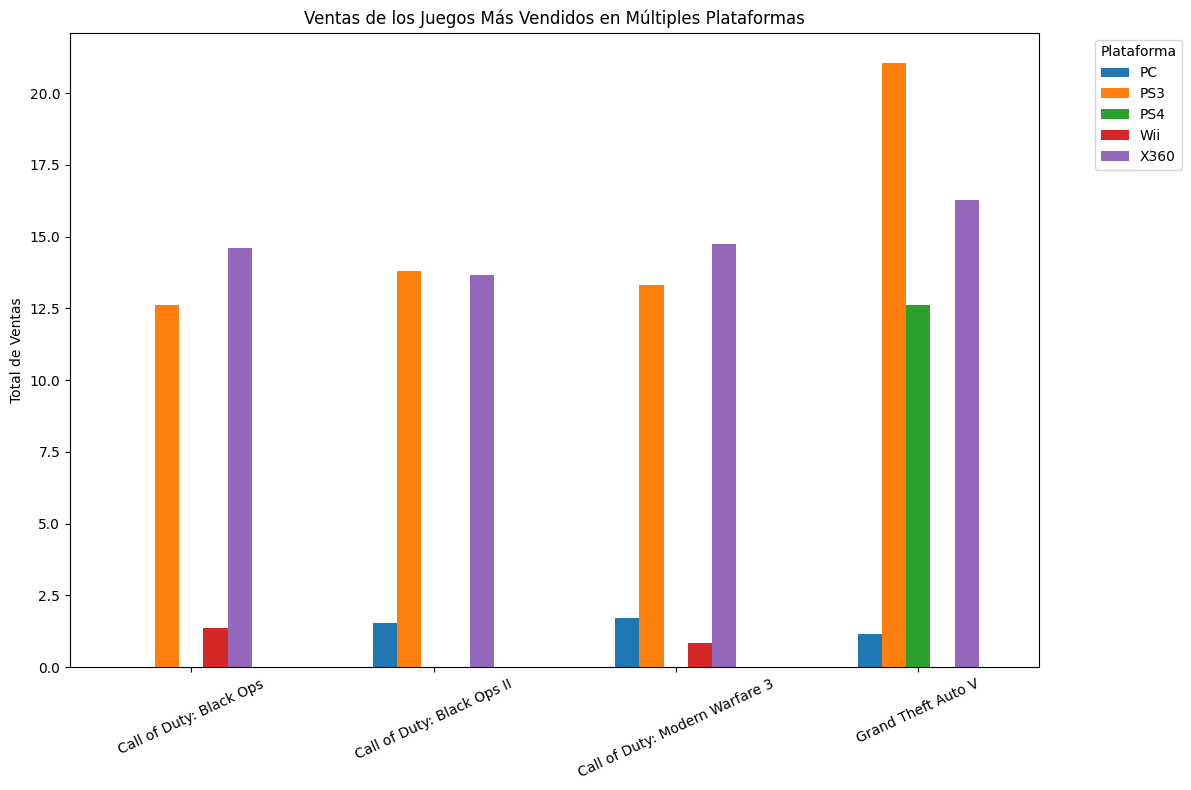

In [62]:
sales_data = games[
    games["name"].isin(top_sales_multiplatform_games)
    & games["platform"].isin(top_sales_consoles)
]

# Crear la gráfica
fig, ax = plt.subplots(figsize=(12, 8))

# Crear una tabla pivot para que `name` sea el índice, `platform` las columnas, y `total_sales` los valores
sales_pivot = sales_data.pivot_table(
    index="name", columns="platform", values="total_sales", aggfunc="sum"
)

# Plot de barras apiladas
sales_pivot.plot(kind="bar", ax=ax, rot=25)

# Configuración de la gráfica
ax.set_title("Ventas de los Juegos Más Vendidos en Múltiples Plataformas")
ax.set_xlabel("")
ax.set_ylabel("Total de Ventas")
ax.legend(title="Plataforma", bbox_to_anchor=(1.05, 1), loc="upper left")

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Este gráfico de barras compara las ventas del top 5 de videojuegos más vendidos que fueron lanzados para 5 consolas diferentes o más. A diferencia del análisis incial en el que se compararon los juegos más vendidos por género en los cuales las consolas de Nintendo fueron las líderes, cuando se comparan los juegos más exitosos en múltiples plataformas Nintendo no se encuentra entre los líderes.


* Parece que los juegos más exitosos en múltiples plataformas son sobre todo de acción y disparos y que tienen mayor éxito en las consolas de Playstation, seguido por el Xbox 360, el PC y finalmente Wii. 

* Los juegos con mayores éxitos históricamente son de Nintendo y son en géneros en su mayoría de Deportes y Carreras. Parece que es un nicho de mercado y lanzar juegos en estos géneros y como se observó anteriormente Nintendo tuvo una caída de la que no se ha recuperado entre 2010 y 2015. Lanzar videojuegos exclusivamente para plataformas de Wii corre el riesgo de tener éxito únicamente si la consola de Nintendo lo tiene. 

* Los juegos con mayor éxito en Nintendo son juegos lanzados entre 2005 y 2008. 


### Distribución de los juegos por género <a class="anchor" id="genre"></a>

In [120]:
# Guarda una lista con los géneros más rentables
top_sales_genres = list(
    games.groupby("genre")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)
print("Géneros con mayores ventas", top_sales_genres)

# Filtra el DF con juegos lanzados después del 2010
recent_years_games = games.query("year_of_release > 2010")

# Guarda una lista con los géneros más rentables para los juegos lanzados despúes del 2010
top_sales_genres_recent = list(
    recent_years_games.groupby("genre")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)
print("Géneros con mayores ventas lanzados después del 2010", top_sales_genres_recent)

Géneros con mayores ventas ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Misc']
Géneros con mayores ventas lanzados después del 2010 ['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc']


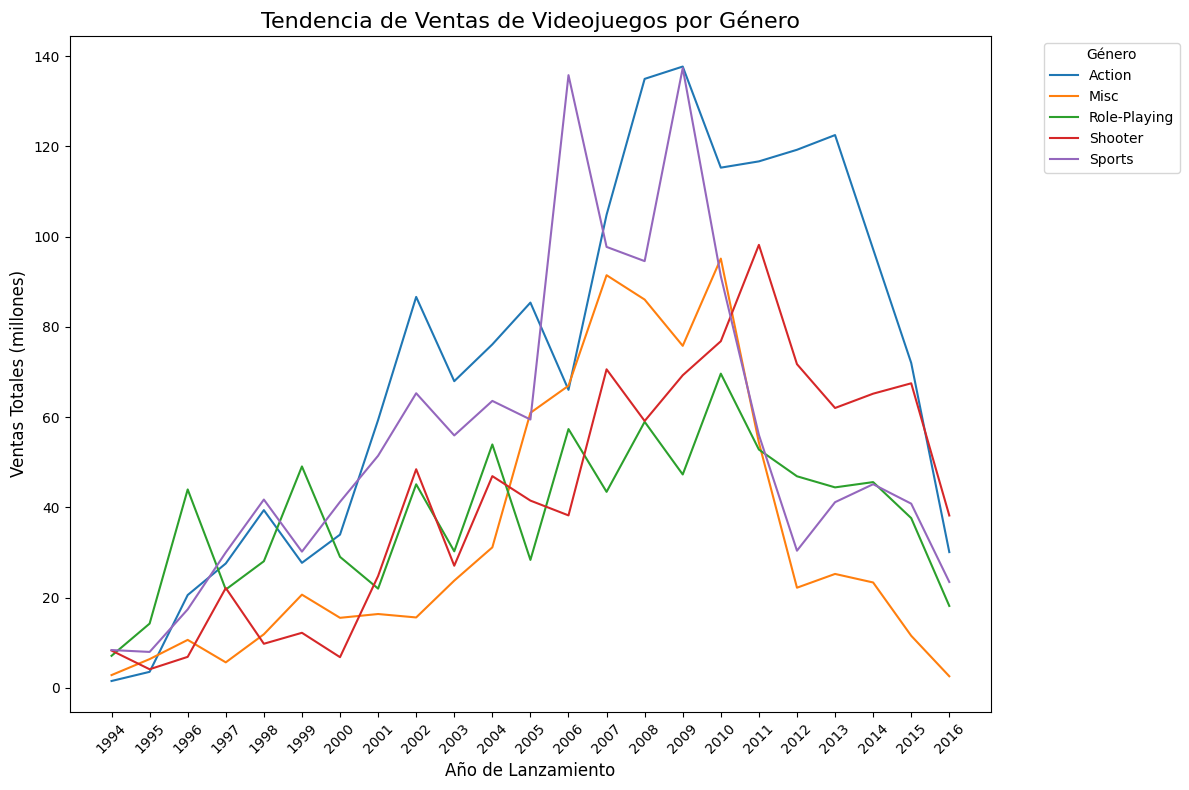

In [121]:
# Crear una tabla pivote con ventas totales por año y género
pivot_sales_genre = games[games["genre"].isin(top_sales_genres)].pivot_table(
    index="year_of_release", columns="genre", values="total_sales", aggfunc="sum"
)

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Generar un gráfico de línea para cada género
for genre in pivot_sales_genre.columns:
    ax.plot(pivot_sales_genre.index, pivot_sales_genre[genre], label=genre)

# Configurar el título, etiquetas y leyenda
ax.set_title("Tendencia de Ventas de Videojuegos por Género", fontsize=16)
ax.set_xlabel("Año de Lanzamiento", fontsize=12)
ax.set_ylabel("Ventas Totales (millones)", fontsize=12)
ax.legend(title="Género", bbox_to_anchor=(1.05, 1), loc="upper left")

# Mejorar el formato del eje X (años)
plt.xticks(pivot_sales_genre.index, rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

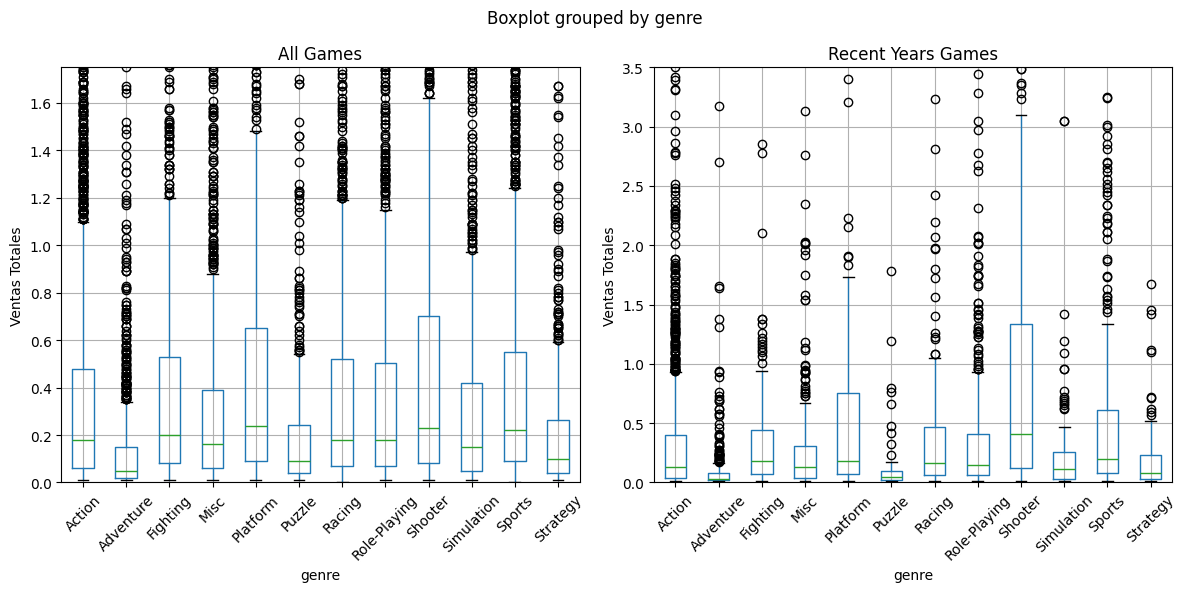

In [122]:
# Configurar la figura con 3 subplots en una fila
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Títulos para los subplots
titles = ["All Games", "Recent Years Games"]

# Datos para los subplots
data_frames = [games, recent_years_games]

# Límites de eje Y
y_lims = [(0, 1.75), (0, 3.5)]

# Generar los boxplots
for ax, df, title, ylim in zip(axes, data_frames, titles, y_lims):
    df.boxplot(column="total_sales", by="genre", ax=ax, vert=True, grid=True)
    ax.set_title(f"{title}")
    ax.set_ylabel("Ventas Totales")
    ax.set_ylim(ylim)  # Establecer el límite del eje y para cada subplot

    # Rotar las etiquetas del eje x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


# Ajustar diseño
plt.tight_layout()
plt.show()

* Existe ver una tendencia a la baja en general para todos los géneros. 

* Los géneros 'Misceláneos' y 'Deportes' han sido los más afectados pues solían tener una alta popularidad y desde el 2012 han tenido menores ventas que los demás generos populares (similar al comportamiento de las ventas de videojuegos en las consolas de Nintendo). 

* Los géneros que han ganado mayor popularidad en años recientes (desde el 2010) son 'Acción' y 'Disparos'.

* Al comparar las distribuciones de las ventas por géneros, podemos concluir que a grandes rasgos, los juegos de: Aventura, Puzzle y Estrategia han sido los menos exitosos. A esta lista le podemos añadir los juegos de Simulación al comparar este género con el éxito que han tenido otros géneros en años más recientes.

* Los juegos de Shooter han tenido un gran crecimiento en años recientes. Su media de ventas es más alta que cualquier otra categoría, rondando los $0.4 MDD, desde el 2010 se lanzaron juegos con una alta popularidad superando las ventas de los $3 MDD para este género.

* Los géneros de Action, Fighting, Racing, Role-Playing y Sports tienen básicamente la misma distribución con una media de ventas inferior a los 0.2 MDD. Se podría decir que en años más recientes los juegos de Deportes y de Plataformas han tenido mayor éxito.

### Perfil de usuario por región <a class="anchor" id="region"></a>

In [140]:
filtered_ratings = (
    games.groupby("rating")["name"].nunique().sort_values(ascending=False)
)

filtered_ratings = list(filtered_ratings[filtered_ratings > 10].index)

ratings_sales = (
    games[games["rating"].isin(filtered_ratings)]
    .groupby("rating")["na_sales"]
    .sum()
    .sort_values()
    .tail(5)
    .reset_index()
)

print(ratings_sales)

rating_sales = games.groupby("rating")["na_sales"].sum()

top_ratings = rating_sales.sort_values().reset_index()

top_ratings["market_share"] = (top_ratings["na_sales"] / rating_sales.sum()) * 100

print(top_ratings)

rating_sales = games.groupby("rating")["na_sales"].sum().sort_values().reset_index()

rating_sales["market_share"] = (rating_sales["na_sales"] / rating_sales.sum()) * 100

print(rating_sales)

  rating  na_sales
0   E10+    345.50
1      M    742.87
2      T    747.58
3     RP    902.99
4      E   1274.24
  rating  na_sales  market_share
0     AO      1.26      0.031355
1     EC      1.53      0.038074
2    K-A      2.56      0.063705
3   E10+    345.50      8.597671
4      M    742.87     18.486113
5      T    747.58     18.603320
6     RP    902.99     22.470655
7      E   1274.24     31.709108
  rating  na_sales market_share
0     AO      1.26          NaN
1     EC      1.53          NaN
2    K-A      2.56          NaN
3   E10+    345.50          NaN
4      M    742.87          NaN
5      T    747.58          NaN
6     RP    902.99          NaN
7      E   1274.24          NaN


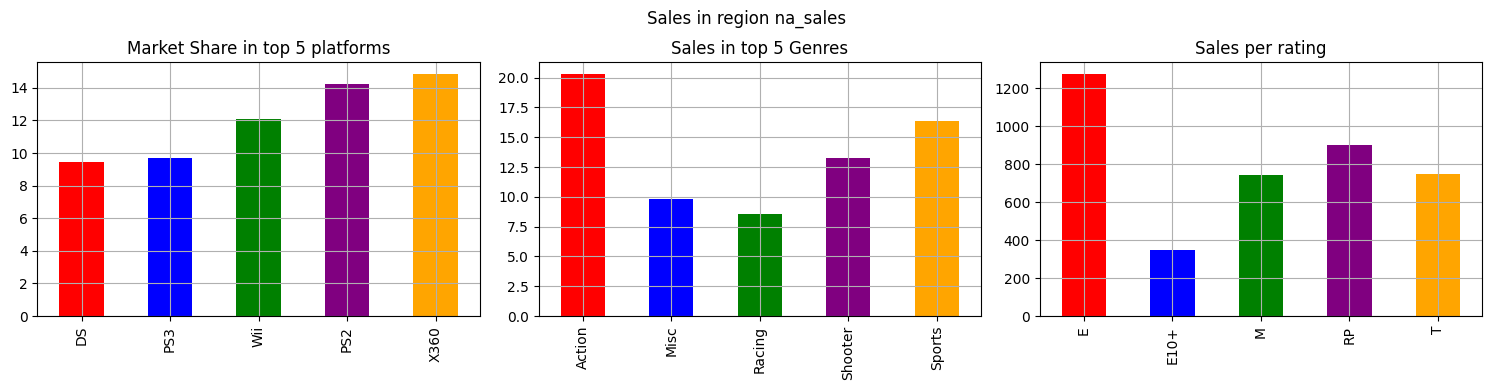

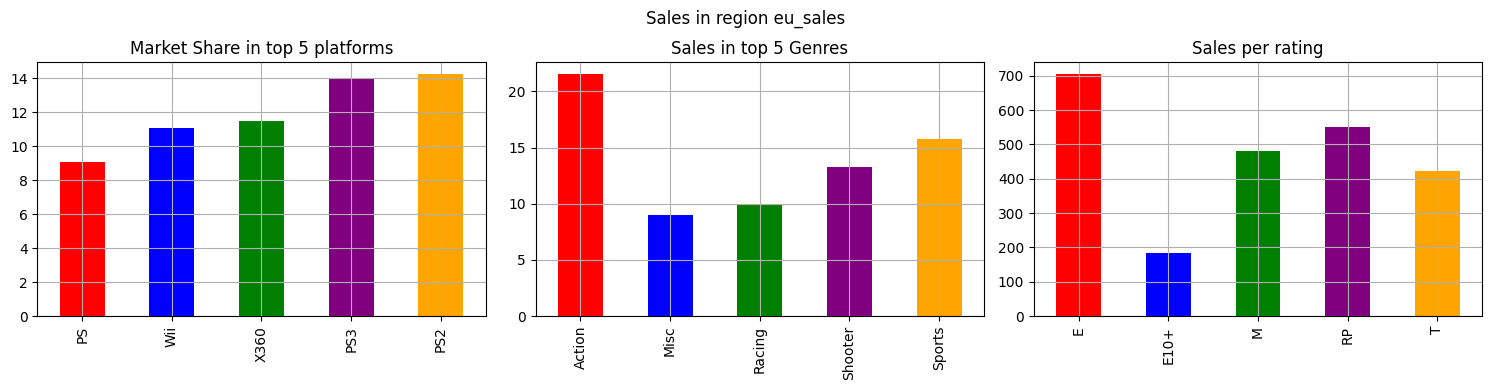

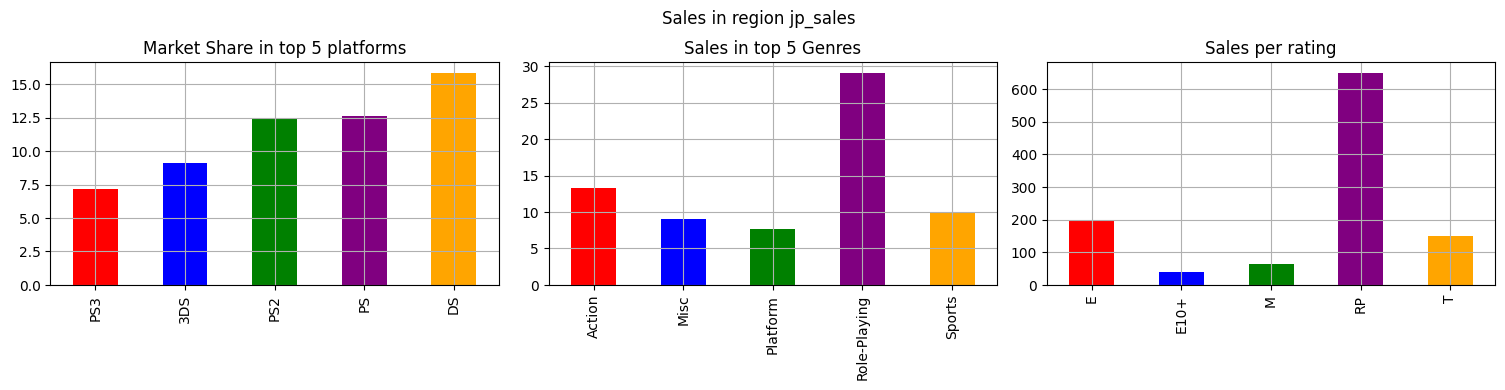

In [147]:
regions = ["na_sales", "eu_sales", "jp_sales"]
colors = ["red", "blue", "green", "purple", "orange"]

for region in regions:

    # Agrupación de plataformas por región
    sales_by_platform = games.groupby("platform")[region].sum()
    top_5_patforms = sales_by_platform.sort_values().tail(5).reset_index()
    top_5_patforms["market_share"] = (
        top_5_patforms[region] / sales_by_platform.sum()
    ) * 100

    # Agrupación de género por región
    top_5_genres = (
        games.groupby("genre")[region].sum().sort_values().tail(5).reset_index()
    )
    top_5_genres = top_5_genres.sort_values(by="genre")
    top_5_genres["market_share"] = (
        top_5_genres[region] / sales_by_platform.sum()
    ) * 100

    # Agrupación de rating por región
    rating_group = games.groupby("rating")[region].sum()
    rating_sorted = rating_group.sort_values().tail(5).reset_index()
    rating_sorted["market_share"] = (rating_sorted[region] / rating_group.sum()) * 100

    rating_sorted = rating_sorted.sort_values(by="rating")

    fig, axes = plt.subplots(ncols=3, figsize=(15, 4))
    fig.suptitle(f"Sales in region {region}", y=0.96)

    axes[0].set_title("Market Share in top 5 platforms")
    top_5_patforms.plot(
        kind="bar",
        x="platform",
        y="market_share",
        xlabel="",
        ax=axes[0],
        legend=False,
        grid=True,
        color=colors,
    )

    axes[1].set_title("Sales in top 5 Genres")
    top_5_genres.plot(
        kind="bar",
        x="genre",
        y="market_share",
        xlabel="",
        ax=axes[1],
        legend=False,
        grid=True,
        color=colors,
    )

    axes[2].set_title("Sales per rating")
    rating_sorted.plot(
        kind="bar",
        x="rating",
        y=region,
        xlabel="",
        ax=axes[2],
        legend=False,
        grid=True,
        color=colors,
    )

    fig.tight_layout(pad=1)

* Cuotas de mercado por consola:
    * En **Norte América** las plataformas más populares están básicamente empatadas con el Xbox 360 con una cuota de mercado de 14.82%, seguido por el PS2 con 14.25%, luego el Wii con 12l 12.11% de ventas y por último el PS3 y el DS tienen una cuota de mercado similar con 9.70% y 9.46%.
    * Para las ventas en **Europa** la consola con el mayor porcentaje de ventas es el PS2 con 14.21% (similar a la cuota de mercado en NA), luego el PS3 con 13.98% y en el caso de Europa el Xbox 360 se encuentra en el tercer lugar con una cuota de 11.46%. El Wii cuenta con una cuota de mercado significativa con el 11% y el PlayStation sigue teniendo popularidad con el 9% de la cuota de mercado.
    * En **Japón** es donde se encuentran mayores diferencias pues el DS es la consola más popular superando el 15% de cuota de mercado. En segundo y tercer lugar están el Playstation y Playstation 2 que parecen tener casi la misma cuota de mercado con un 12.5%. El 3DS tiene una cuota de mercado de alrededor del 9% y por último el Playstation 3 que tiene una cuota de menos del 7.5%. 

* Géneros más populares:
    * Los géneros populares en Norte América y Europa son los mismos y casi todos en los mismos porcentajes de ventas a excepción de que en NA los juegos Misceláneos son más vendidos que los de Carreras y visceversa en Europa. Los tres géneros más vendidos en estas regiones son Acción, Deportes y Disparos.
    * En el caso de Japón los Juegos de Roles son por mucho más populares que el resto de generos con una cuota de mercado de casi 30%, los juegos de Acción son los segundos más vendidos con una cuota de menos del 15% y los juegos de Deporte son los terceros más populares con una cuota del 10%.

* ¿El rating afecta a las ventas regionales?
    * Para Norte América y Europa, parece que el rating de los videojuegos les afecta en igual medida, los videojuegos más vendidos son los de clasificación Everyone, seguidos por Rating Pending. La única diferencia está en que en Europa los juegos de clasificación Mature son los terceros más cosumidos y en Norte América son los Teen que casi están empatados con Mature. 
    * En Japón los videojuegos más consumidos tienen el rating pendiente, luego le siguen los de clasificación Everyone y finalmente los de clasificación Teen.

## Pruebas de hipótesis <a class="anchor" id="hipotesis"></a>

###  Las reseñas promedio de los usuarios para las plataformas Xbox One y PC son las mismas <a class="anchor" id="test1"></a>

La hipótesis nula es confirmar si las reseñas promedio de los usuarios de Xbox One y PC son las mismas.
Establecemos un nivel de significación del 5%.

In [47]:
xbox = games[games["platform"] == "XOne"]["user_score_float"].dropna()
pc = games[games["platform"] == "PC"]["user_score_float"].dropna()
alpha = 0.05

print(xbox.var(), pc.var())

1.9069968429360695 2.3231900019831713


In [48]:
# Prueba si las varianzas de las muestras son similares
stat, p_value = st.levene(xbox, pc)
print(f"Statistic: {stat}, p-value: {p_value}")

if p_value < alpha:
    print(
        "Las varianzas son significativamente diferentes. Rechazamos la hipótesis nula."
    )
else:
    print(
        "No hay evidencia suficiente para decir que las varianzas son diferentes. No podemos rechazar la hipótesis nula."
    )

Statistic: 1.0495291440389176, p-value: 0.3058813785004164
No hay evidencia suficiente para decir que las varianzas son diferentes. No podemos rechazar la hipótesis nula.


In [49]:
# Prueba si las medias de las muestras son las mismas
stat, p_value = st.ttest_ind(xbox, pc)  # realizar una prueba
print(f"Statistic: {stat}, p-value: {p_value}")

if p_value < alpha:  # comparar el valor p con el umbral
    print("Las medias son significativamente diferentes. Rechazamos la hipótesis nula")
else:
    print(
        "No hay evidencia suficiente para decir que las medias son diferentes. No podemos rechazar la hipótesis nula"
    )

Statistic: -4.455638657446673, p-value: 9.379956219356064e-06
Las medias son significativamente diferentes. Rechazamos la hipótesis nula


###  Las reseñas promedio de los usuarios para los géneros de Acción y Deportes son diferentes <a class="anchor" id="test2"></a>

In [50]:
action = games[games["genre"] == "Action"]["user_score_float"].dropna()
sports = games[games["genre"] == "Sports"]["user_score_float"].dropna()

alpha = 0.05

print(action.var(), sports.var())

2.027493768262496 2.623055812519272


In [51]:
# Prueba si las varianzas de las muestras son similares
stat, p_value = st.levene(action, sports)
print(f"Statistic: {stat}, p-value: {p_value}")

if p_value < alpha:
    print(
        "Las varianzas son significativamente diferentes. Rechazamos la hipótesis nula."
    )
else:
    print(
        "No hay evidencia suficiente para decir que las varianzas son diferentes. No podemos rechazar la hipótesis nula."
    )

Statistic: 15.429831733332641, p-value: 8.763985507236272e-05
Las varianzas son significativamente diferentes. Rechazamos la hipótesis nula.


In [52]:
# Prueba si las medias de las muestras son las mismas
stat, p_value = st.ttest_ind(action, pc, equal_var=False)  # realizar una prueba
print(f"Statistic: {stat}, p-value: {p_value}")

if p_value < alpha:  # comparar el valor p con el umbral
    print("Las medias son significativamente diferentes. Rechazamos la hipótesis nula")
else:
    print(
        "No hay evidencia suficiente para decir que las medias son diferentes. No podemos rechazar la hipótesis nula"
    )

Statistic: -0.22290459142975622, p-value: 0.8236440922686036
No hay evidencia suficiente para decir que las medias son diferentes. No podemos rechazar la hipótesis nula
